# **Linear Regression para Laptop Pricing**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv")
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


## **1. Simple Linear Regression**
---

In [3]:
X = df[["CPU_frequency"]]
y = df.Price

In [4]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [9]:
yhat = lm.predict(X)

C:\Users\AlxMa\AppData\Local\Temp\ipykernel_20848\808511542.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df["Price"], hist = False, color='r', label='Actual Label')
C:\Users\AlxMa\AppData\Local\Temp\ipykernel_20848\808511542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

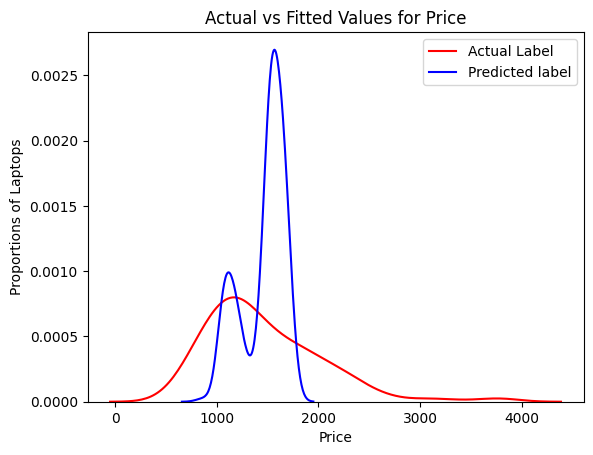

In [11]:
ax1 = sns.distplot(df["Price"], hist = False, color='r', label='Actual Label')

sns.distplot(yhat, hist=False, color='b', label='Predicted label')

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price")
plt.ylabel("Proportions of Laptops")
plt.legend()
plt.show()

In [21]:
r2 = lm.score(X, y)
print("R-cuadrada: ", r2)

R-cuadrada:  0.1344436321024326


In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df["Price"], yhat)
print("MSE: ", mse)

MSE:  284583.4405868629


## **Regresión Lineal Múltiple**
---

In [23]:
X = df[["CPU_frequency", "RAM_GB", "Storage_GB_SSD", "OS", "GPU", "Category"]]
y = df["Price"]

In [24]:
mlr = LinearRegression()

mlr.fit(X, y)

yhat = mlr.predict(X)

C:\Users\AlxMa\AppData\Local\Temp\ipykernel_20848\770887537.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df["Price"], hist=False, color='r', label='Actual label')
C:\Users\AlxMa\AppData\Local\Temp\ipykernel_20848\770887537.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

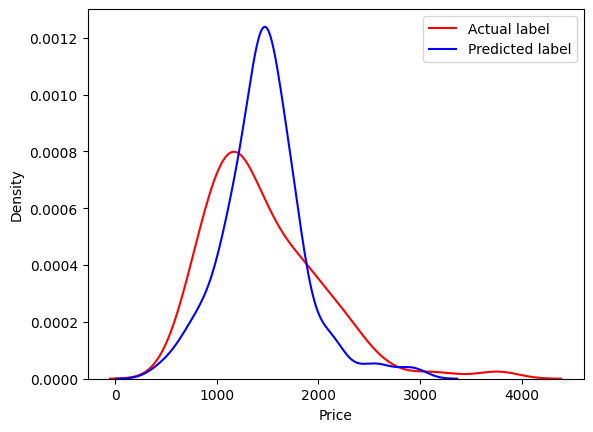

In [27]:
ax1 = sns.distplot(df["Price"], hist=False, color='r', label='Actual label')

sns.distplot(yhat, hist=False, color='b', label='Predicted label')

plt.legend()


In [28]:
mlr.score(X, y)

0.4953391380896961

In [29]:
mean_squared_error(y, yhat)

165925.7903223724

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
mlr = LinearRegression()
mlr.fit(X_scaled, y)
yhat = mlr.predict(X_scaled)

In [33]:
mlr.score(X_scaled, y)

0.4953391380896961

In [34]:
mean_squared_error(y, yhat)

165925.7903223724

## **Polynomial Regression**
---

In [39]:
X = df[["CPU_frequency"]]
y = df["Price"]

In [40]:
X = X.to_numpy().flatten()

In [41]:
f1 = np.polyfit(X, y, 1)
p1 = np.poly1d(f1)

f2 = np.polyfit(X, y, 3)
p2 = np.poly1d(f2)

f3 = np.polyfit(X, y, 5)
p3 = np.poly1d(f3)

In [42]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

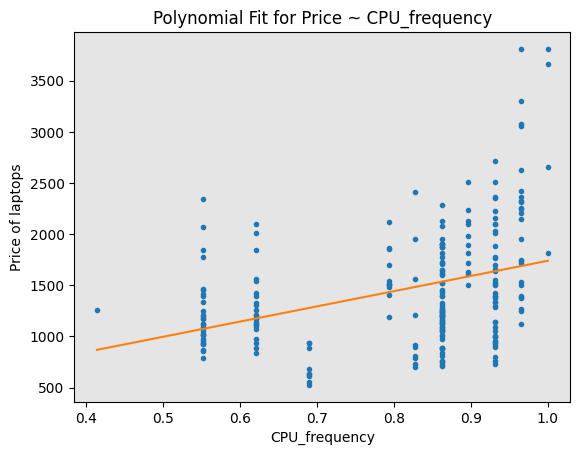

In [43]:
PlotPolly(p1, X, y, "CPU_frequency")

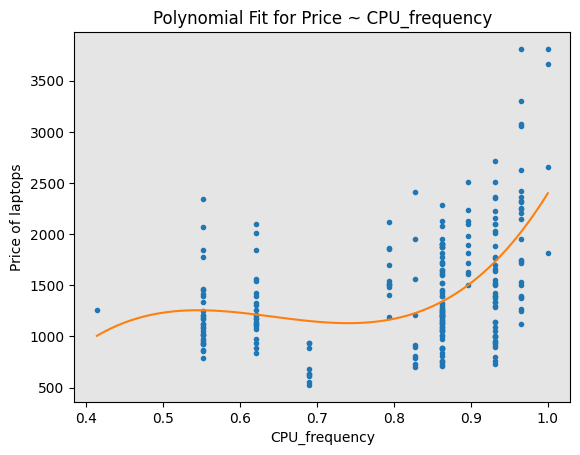

In [44]:
PlotPolly(p2, X, y, "CPU_frequency")

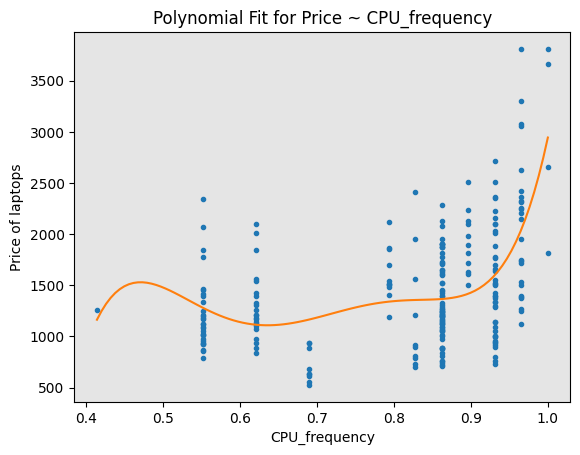

In [45]:
PlotPolly(p3, X, y, "CPU_frequency")

In [49]:
from sklearn.metrics import r2_score

print("--- P1 ---")
print("R2: ", r2_score(y, p1(X)))
print("MSE: ", mean_squared_error(y, p1(X)))

print("--- P2 ---")
print("R2: ", r2_score(y, p2(X)))
print("MSE: ", mean_squared_error(y, p2(X)))

print("--- P3 ---")
print("R2: ", r2_score(y, p3(X)))
print("MSE: ", mean_squared_error(y, p3(X)))

--- P1 ---
R2:  0.1344436321024326
MSE:  284583.4405868629
--- P2 ---
R2:  0.2669264079653113
MSE:  241024.86303848765
--- P3 ---
R2:  0.3030822706443915
MSE:  229137.29548053455


## **4. Pipeline**
---

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("polynomial", PolynomialFeatures(include_bias=False)),
    ("model", LinearRegression())
])

In [55]:
Z = df[["CPU_frequency", "RAM_GB", "Storage_GB_SSD", "OS", "GPU", "Category"]]
Z = Z.astype(float)
pipe.fit(Z, y)
ypipe = pipe.predict(Z)

In [56]:
r2_score(y, ypipe)

0.6117803876986264

In [57]:
mean_squared_error(y, ypipe)

127641.45360097164

---
## Extras (No inlcuidos en el curso)
---

In [12]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

X = df[["CPU_frequency", "RAM_GB", "Storage_GB_SSD", "OS", "GPU", "Category"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_poly = PolynomialFeatures(degree=10).fit_transform(X_scaled)

In [13]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.0001, random_state=42)

In [14]:
ridge_reg.fit(X_poly, y)

C:\Users\AlxMa\anaconda3\envs\Colab\Lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Ridge(alpha=0.0001, random_state=42)

In [15]:
yhat = ridge_reg.predict(X_poly)
print(ridge_reg.score(X_poly, y))
print(mean_squared_error(y,yhat))

0.6530749357165933
114064.35453695882


In [16]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.01, random_state=42)
lasso_reg.fit(X_poly, y)
yhat = lasso_reg.predict(X_poly)
print(lasso_reg.score(X_poly, y))
print(mean_squared_error(y,yhat))

0.7426616418343885
84609.43513087397


C:\Users\AlxMa\anaconda3\envs\Colab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.011e+07, tolerance: 7.825e+03
  model = cd_fast.enet_coordinate_descent(


In [24]:
from sklearn.linear_model import ElasticNet

elastic_reg = ElasticNet(alpha=1, l1_ratio=1, max_iter=10000, random_state=42)
elastic_reg.fit(X_poly, y)
yhat = elastic_reg.predict(X_poly)
print(elastic_reg.score(X_poly, y))
print(mean_squared_error(y,yhat))

0.7481984237138528
82789.01476834547


C:\Users\AlxMa\anaconda3\envs\Colab\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e+07, tolerance: 7.825e+03
  model = cd_fast.enet_coordinate_descent(


In [26]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

In [27]:
sgd_reg.fit(X_poly, y)
yhat = sgd_reg.predict(X_poly)
print(r2_score(y, yhat))
print(mean_squared_error(y,yhat))

-2.4664171367942656e+37
8.109252045782146e+42
